# Introduction to scientific computation with Python
***

[Python](https://en.wikipedia.org/wiki/Python_(programming_language)) is a high level computational language. It is quite similar to Matlab, but with the advantage that is is open source, free and internet is [plenty of libraries](https://pypi.org/) that 
allow to solve a large variety of problems.

The main libraries used in scientific computations are **[numpy](https://numpy.org/)** for numerical computation, **[sympy](https://www.sympy.org/en/index.html)** for Computer Albegra System (CAS), **[matplotlib](https://matplotlib.org/)** for plotting, and **[pandas](https://pandas.pydata.org/)** for data analysis. All this packages are collected in the **[scipy](https://www.scipy.org/)** ecosystem.

One practical way to compute with python is a [Jupyter](https://jupyter.org/) notebook, like the present one. It allows to combine text, equations, graphs and pictures with code. One of the most interesting features of a Jupyter Notebook is that it is interactive. That means that the user can download, open and play with it. 

All that can be installed in any system (Windows, Mac, Linux,...) (and even in an android phone!) but it is highly recommended to install through an special distribution. The most popular is now [Anaconda](https://en.wikipedia.org/wiki/Anaconda_(Python_distribution)) that has free and paid versions. However, recently it has been launched an small multi-platform application called [Jupyterlab Desktop](https://github.com/jupyterlab/jupyterlab-desktop) that is very recommended because of its size and practicality.

## 1. Numpy

Python is a powerful language. Its power lies mainly in its modulability. With naked python few interesting things can be done. But modules of libraries can be easily imported and used to perform almost everything we need.

In maths and science, one of the main modules is numpy, which gives acces to numerical computations with arrays, matrix, functions, ... with optimized performance. 

To import a module in python is very easy (as long as it is installed in the system...). Just type

In [1]:
import numpy

and access any component of the library with, por example

In [2]:
numpy.log(3)

1.0986122886681098

Another way to import a module is with 

In [3]:
from numpy import *

and then you can use the same components without need of type the word _numpy_ everytime

In [4]:
log(3)

1.0986122886681098

The last way is with

In [43]:
import numpy as np
np.log(3)

This last is my favorite, but you can use whichever you prefer.

If the module is not installed in the system it can be easily downloaded and installed with a `pip` (Package Installer for Python)  command in a python cell:

> !pip install numpy

The `!` symbols is to scape to shell to execute the command.

To get fast information about any component of python or any module, just type a '?' at the end of the command

In [6]:
np.log?

Call signature:  np.log(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'log'>
File:            ~/.config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/numpy/__init__.py
Docstring:      
log(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Natural logarithm, element-wise.

The natural logarithm `log` is the inverse of the exponential function,
so that `log(exp(x)) = x`. The natural logarithm is logarithm in base
`e`.

Parameters
----------
x : array_like
    Input value.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations wh

## 2. Sympy

With the library [_sympy_](https://peerj.com/articles/cs-103/) symbolic manipulation of mathematical equations can be performed, in a similar way as with Maple, Mathematica or Wolfram Alpha. 

The command 

```python
try:
    ...
except:
    ...
```
tries to execute something (in this case, it tries to import `sympy`) and, if it fails, run the command in `except:`, in this case, it install 
the version 1.7.1 of `sympy`.

In [1]:
try:
    import sympy as sp
except:
    !pip install sympy==1.7.1

The first step to perform symbolic computation is to declare the _symbols_ that are going to used

In [4]:
x,y = sp.symbols('x,y')

If, in addition, we include the command 

In [5]:
sp.init_printing()

the ouput will be nicely rendered in a Jupyter notebook

In [6]:
sp.sqrt(x)

An expression can be build with our symbols

In [7]:
expr = 1+2*x**2*(x-1)-x**3
display(expr)

and it can be simplified, either with

In [8]:
sp.simplify(expr)

or with

In [9]:
expr.simplify()

Expressions can be factorized                                                                                           

In [10]:
expr = expr.factor()
display(expr)

or expanded again

In [11]:
expr = expr.expand()
display(expr)

We can **solve equations**, by defining an equality of two expressions with the _sympy.Eq()_ class

In [12]:
equation = sp.Eq(y,expr)
display(equation)

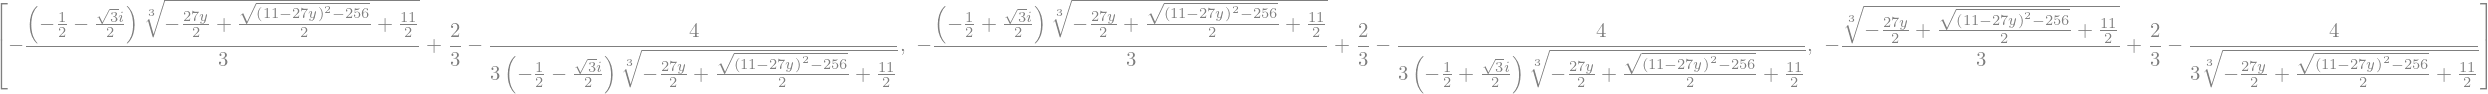

In [13]:
x_sol = sp.solve(equation,x)
display(x_sol)

It gives 3 complex solutions. We can access to each of them as member of an array

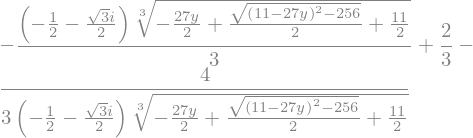

In [14]:
display(x_sol[0])

Or we can solve systems of equations

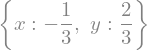

In [15]:
eq1 = x + 2*y - 1
display(eq1)
eq2 = x - y + 1
display(eq2)
eq_sol = sp.solve([eq1,eq2],[x,y])
display(eq_sol)

We can make substitutions in an expression, with _subs()_

In [16]:
expr = expr.subs(x,x+1)
display(expr)

or with _replace()_ that is often more powerful 

In [17]:
expr = expr.replace(x,3*x)
display(expr)

Several substitutions can be performed by means of a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)

In [18]:
changes = {y:sp.cos(y),x:sp.sqrt(x)}
equation = equation.subs(changes)
display(equation)

We can also perform **numerical evaluations**.

The best way is with a [lambda](https://docs.python.org/3/tutorial/controlflow.html?highlight=lambda#lambda-expressions) method that creates a function to evaluate any value

In [19]:
expr_func = sp.lambdify(x,expr)
expr_func(2.0)

### Manipulating algebraic functions and solvind ODEs

Besides symbols, we can define functions, and its derivatives

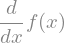

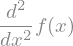

In [20]:
f = sp.Function('f')
display(f(x))
display(f(x).diff(x))
display(f(x).diff(x,2))

In this case, the function $f(x)$ is not defined and `sympy` can just represents symbolicaly its derivative. But we can
make the derivative of any expression

In [21]:
expr.diff(x)

In [22]:
expr.diff(x,2)

Also we can, of course, integrate a function

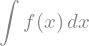

In [23]:
f(x).integrate()

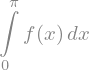

In [24]:
f(x).integrate((x,0,sp.pi))

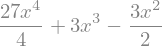

In [25]:
expr.integrate()

In [26]:
expr.integrate((x,0,1))

We can calculate series expansion, both symbolicaly

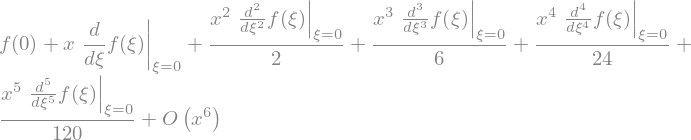

In [27]:
f(x).series(x)

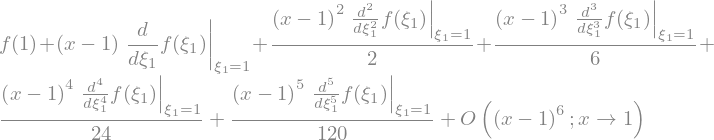

In [28]:
f(x).series(x,1)

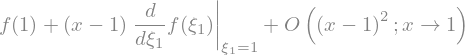

In [29]:
f(x).series(x,1,n=2)

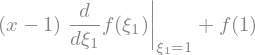

In [30]:
f(x).series(x,1,n=2).removeO()

or explicitely

In [31]:
sqrt_x = sp.sqrt(x)
display(sqrt_x)

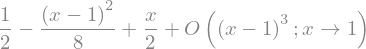

In [32]:
sqrt_x.series(x,1,n=3)

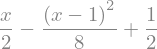

In [33]:
sqrt_x.series(x,1,n=3).removeO()

*** 

Let's now solve an ODE

Let's consider the first order ODE for Newton's cooling law

$$ \frac{\text{d} T}{\text{d}t} = -k \left(T(t) - T_a\right) $$

with $T(0) = T_0$.

In [34]:
t,k,Ta,T0 = sp.symbols('t,k,T_a,T_0')
T = sp.Function("T")

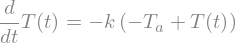

In [35]:
ode = sp.Eq(T(t).diff(t),-k*(T(t)-Ta))
display(ode)

In [36]:
ode_sol = sp.dsolve(ode)
display(ode_sol)

and it can be done directly with the initial condition 

In [37]:
ode_sol = sp.dsolve(ode,ics={T(0):T0})
display(ode_sol)

***
For a second order ODE, let's consider a damped harmonic oscillator

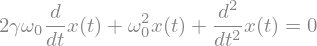

In [38]:
t,omega0,gamma = sp.symbols('t,omega0,gamma',positive=True)
x = sp.Function('x')
ode2 = sp.Eq(x(t).diff(t,2)+2*gamma*omega0*x(t).diff(t)+omega0**2*x(t),0)
display(ode2)

In [39]:
ode2_sol = sp.dsolve(ode2)
display(ode2_sol)

The boundary conditions are that $x=1$ and its derivative is 0 for $t=0$.

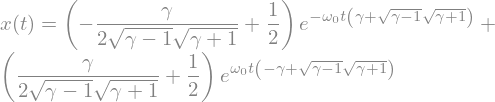

In [40]:
ics = {x(0):1,x(t).diff(t).subs(t,0):0}
ode2_sol = sp.dsolve(ode2,ics=ics)
display(ode2_sol)

***

We see now how to plot a particular case of this equations by using [matplotlib](https://matplotlib.org/)

we are going to consider the case $\omega_0 = 2\pi$ and $\gamma = 0.1$

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

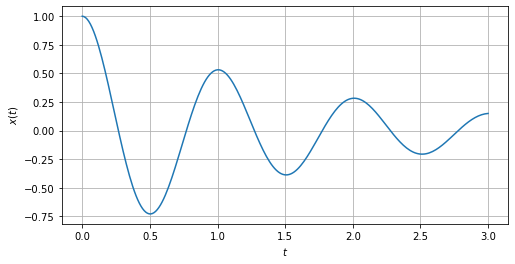

In [44]:
values = {omega0: 2*sp.pi,gamma:0.1}
fig,ax = plt.subplots(figsize=(8,4))
tt = np.linspace(0,3,250)
x_t = sp.lambdify(t,ode2_sol.rhs.subs(values))
ax.plot(tt,x_t(tt).real) # There are some complex results. We take only the real part
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x(t)$')
ax.grid(which='major',axis='both')

### Example: Solving the equation of motion of a roquet

In this example we are going to use `sympy` to solve the equation of motion of a roquet, as described in many basic Fluid Mechanics textbook. See, for instance, example 3.12 of [White's book](https://discovery.upc.edu/permalink/34CSUC_UPC/11q3oqt/alma991004874831006711)

In [45]:
import sympy as sp

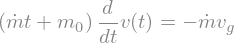

In [46]:
m0,mDot,t,vg = sp.symbols('m_0,\dot{m},t,v_g')
v = sp.Function('v')
ode = sp.Eq((m0+mDot*t)*v(t).diff(t),-mDot*vg)
display(ode)

In [47]:
condCont = {v(0):0}
sol = sp.dsolve(ode,ics=condCont)
display(sol)

We test and plot the solutions with some random values:

$$
 \dot{m} = -1\;\textrm{kg/s} \\
 m_0 = 400\;\textrm{Kg} \\
 v_g = 10\;\textrm{m/s}
$$


In [48]:
values = {mDot:-1,m0:400,vg:10}
v_t = sp.lambdify(t,sol.rhs.subs(values))

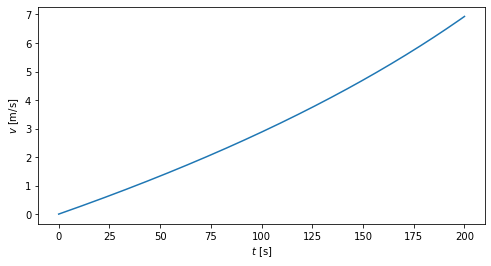

In [49]:
import matplotlib.pyplot as plt
import numpy as np
tt = np.linspace(0,200,250)
vtt = v_t(tt)
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(tt,vtt)
ax.set_xlabel(r'$t$ [s]')
ax.set_ylabel(r'$v$ [m/s]');

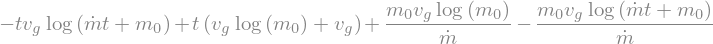

In [50]:
x = sol.rhs.integrate((t,0,t))
display(x)

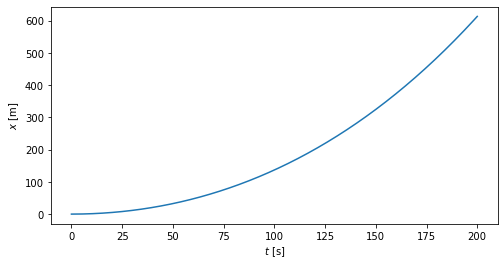

In [51]:
x_t = sp.lambdify(t,x.subs(values))
xtt = x_t(tt)
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(tt,xtt)
ax.set_xlabel(r'$t$ [s]')
ax.set_ylabel(r'$x$ [m]');

## 3. Pandas

Pandas is a library for data analysis. Is some kind of powerful datasheet. 
Documentation is [here](https://pandas.pydata.org/pandas-docs/stable/index.html#).

The two main data structures are *Series* and *DataFrame*

### Series

A Series is an array that can be indexed with labels instead of integers

For example, we can make a Series with grades in some subjects 

In [52]:
import pandas as pd

In [53]:
grades = pd.Series([5.5,7.6,4.3,8.6,6.5])
grades

0    5.5
1    7.6
2    4.3
3    8.6
4    6.5
dtype: float64

In [54]:
grades.index

RangeIndex(start=0, stop=5, step=1)

This is the array inside the Series

In [55]:
grades.values

array([5.5, 7.6, 4.3, 8.6, 6.5])

And now we can changes index

In [56]:
grades.index = ["Maths","Spanish","Catalan","Physics","German"]
grades.name = "Grades"
grades

Maths      5.5
Spanish    7.6
Catalan    4.3
Physics    8.6
German     6.5
Name: Grades, dtype: float64

That could be also done with

It is easy to access to some values

In [57]:
grades["Physics"]

In [58]:
grades[["Maths","Physics","German"]]

Maths      5.5
Physics    8.6
German     6.5
Name: Grades, dtype: float64

Some statistics:

In [59]:
print("Median of grades is {0}".format(grades.median()))
print("Mean of grades is {0}".format(grades.mean()))
print("Standard deviation of grades is {0}".format(grades.std()))
print("Maximum of grades is {0}".format(grades.max()))
print("Minimum of grades is {0}".format(grades.min()))
print("Quartile of grades is {0}".format(grades.quantile(0.25)))

Median of grades is 6.5
Mean of grades is 6.5
Standard deviation of grades is 1.6926310879810755
Maximum of grades is 8.6
Minimum of grades is 4.3
Quartile of grades is 5.5


Also, in brief

In [60]:
grades.describe()

count    5.000000
mean     6.500000
std      1.692631
min      4.300000
25%      5.500000
50%      6.500000
75%      7.600000
max      8.600000
Name: Grades, dtype: float64

Plot method can be used for easily plot data

In [61]:
import matplotlib.pyplot as plt

<AxesSubplot:>

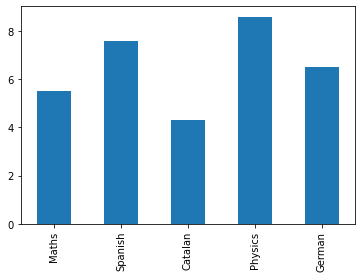

In [62]:
fig,axes = plt.subplots()
grades.plot(kind='bar')

### DataFrame
It is like a multidimensional Series. Typically, a table

In [63]:
subjects = pd.DataFrame(grades)

In [64]:
subjects.columns

Index(['Grades'], dtype='object')

In [65]:
subjects

,Grades
Maths,5.5
Spanish,7.6
Catalan,4.3
Physics,8.6
German,6.5


In [66]:
teachers = pd.Series(["Dave","Ana","John","Grace","Mike"],name="Teacher",index = ["Maths","Spanish","Catalan","Physics","German"])

In [67]:
subjects = subjects.join(teachers)

In [68]:
subjects

,Grades,Teacher
Maths,5.5,Dave
Spanish,7.6,Ana
Catalan,4.3,John
Physics,8.6,Grace
German,6.5,Mike


In [69]:
subjects.Grades.mean()

In [70]:
subjects.loc["Maths"]

Grades      5.5
Teacher    Dave
Name: Maths, dtype: object

In [71]:
subjects.Teacher

Maths       Dave
Spanish      Ana
Catalan     John
Physics    Grace
German      Mike
Name: Teacher, dtype: object

## 4. Data fitting

### Linear regression

Some times we need to fit experimental data in order to create a model (a math expression). There are two main python modules to make it: [statsmodels](https://www.statsmodels.org/stable/index.html) and [patsy](https://patsy.readthedocs.io/en/latest/). Actually, statsmodel calls internally to patsy, and it is ususlly not necessary to explicitely import it, but we are doing it for the sake of clarity

In [72]:
#This command resets the python kernel, and remove all modules, variables and data
%reset -f 

:::{note}
If not done, you have to install the `statsmodels` module with 

> pip install statsmodel

:::

In [73]:
try:
    import statsmodels.api as sm
except:
    !pip install statsmodel
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let's consider the next image, taken from [Wikipedia-Scatter Plot](https://en.wikipedia.org/wiki/Scatter_plot)

<!--- <img src="Scatter_plot.png" width="400"> --->

![Scatter_plot.png](Scatter_plot.png)

The first step is to get the data. It is done with a plot digitizer. There are several tools to do that: [3gdata](https://github.com/pn2200/g3data) for linux, the Java app [Plot Digitizer](http://plotdigitizer.sourceforge.net/) or the online app [Web Plot Digitizer](https://apps.automeris.io/wpd/). I recommend this last one. With this app we can generate a CSV file, that I have called "Scatter_data.csv".

The second step is to load this data file into a pandas DataFrame

In [74]:
ScatterData = pd.read_csv("Scatter_data.csv",header=None,names=["x","y"]) # It's important the names for the columns data
ScatterData.head()

,x,y
0,0.011,103.186
1,0.344,101.689
2,0.678,102.855
3,1.011,101.286
4,1.344,100.897


We can plot it to check it...

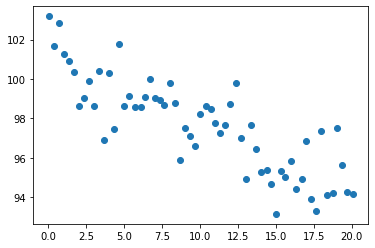

In [75]:
plt.scatter(ScatterData["x"],ScatterData["y"])

The third step is to create a model. We are using a formula for the model. Actually, it is just a linear regression, made with [ordinary least square](https://en.wikipedia.org/wiki/Ordinary_least_squares) estimation. Check [here](https://patsy.readthedocs.io/en/latest/formulas.html#) how is the syntax for the formulae in patsy.

In [76]:
model = smf.ols("y~x",ScatterData)

That only creates the model, but does not compute anything. The computation is made with the fit method.

In [77]:
result = model.fit()

We check the result

In [78]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           3.34e-17
Time:                        08:37:09   Log-Likelihood:                -102.79
No. Observations:                  61   AIC:                             209.6
Df Residuals:                      59   BIC:                             213.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.0919      0.336    300.828      0.000     100.420     101.764
x             -0.3422      0.029    -11.824      0.000      -0.400      -0.284
==============================================================================
Omnibus:                        0.117   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.155
Skew:                           0.095   Prob(JB):                        0.925
Kurtosis:                       2.841   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The result object has a lot of components. One is the _params_: the coefficient _Intercept_ which is the independent term, and the _x_, which is, in this case, the kinear term coefficient.

In [79]:
display(result.params["Intercept"])
display(result.params["x"])

In the last step, let's now plot it to see how it looks like. 

First, we create the set of _x_ points to make the plot. It has to be a pandas DataFrame. 

In [80]:
x_plot = pd.DataFrame(pd.Series(np.linspace(0,20,250),name="x"))

and now we calculate the prediction, according to our linear model

In [81]:
y_plot = result.predict(x_plot)

In [82]:
x_plot

,x
0,0.000000
1,0.080321
2,0.160643
3,0.240964
4,0.321285
...,...
245,19.678715
246,19.759036
247,19.839357
248,19.919679


and, finally, we plot it

Text(9.0, 101, '$y = 101.09 -0.34x$')

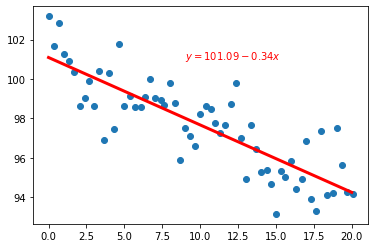

In [83]:
a = result.params["Intercept"]
b = result.params["x"]
plt.scatter(ScatterData["x"],ScatterData["y"])
plt.plot(x_plot.values,y_plot,"r-",linewidth=3)
plt.text(9.0,101,r"$y = {:.2f} {:+.2f}x$".format(a,b),color="red")

If we want to make another fit, for example, with a quadratic expression, we have to create another column in the DataFrame with the new data (in this case, with $x^2$). This is still considered a linear regression, since it can be written as linear combination of polynomical terms $ y = \sum_{n=0}^{N} a_n x^n$. Note also that a model as $y=a_0x^{a_1}$, or $y=a_0\exp(a_1x)$, can be tranformed into a linear model just calculating logarithm of both sides.

In [84]:
ScatterData["x2"] = ScatterData["x"]**2

In [85]:
ScatterData.head(3)

,x,y,x2
0,0.011,103.186,0.000121
1,0.344,101.689,0.118336
2,0.678,102.855,0.459684


and then we create the new model, and perform the `fit()` method

In [86]:
sqr_model = smf.ols('y~ x + x2',ScatterData)

In [87]:
sqr_result = sqr_model.fit()

In [88]:
sqr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     69.69
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           3.76e-16
Time:                        08:37:29   Log-Likelihood:                -102.49
No. Observations:                  61   AIC:                             211.0
Df Residuals:                      58   BIC:                             217.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.3684      0.496    204.170      0.000     100.375     102.362
x             -0.4262      0.114     -3.724      0.000      -0.655      -0.197
x2             0.0042      0.006      0.759      0.451      -0.007       0.015
==============================================================================
Omnibus:                        0.048   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.166
Skew:                           0.061   Prob(JB):                        0.920
Kurtosis:                       2.775   Cond. No.                         540.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
sqr_result.params

Intercept    101.368371
x             -0.426238
x2             0.004192
dtype: float64

In [90]:
x2_plot = x_plot.join(pd.Series(x_plot["x"]**2,name="x2"))

In [91]:
x2_plot

,x,x2
0,0.000000,0.000000
1,0.080321,0.006452
2,0.160643,0.025806
3,0.240964,0.058064
4,0.321285,0.103224
...,...,...
245,19.678715,387.251819
246,19.759036,390.419509
247,19.839357,393.600103
248,19.919679,396.793600


In [92]:
y2_plot = sqr_result.predict(x2_plot)

Text(9.0, 100, '$y = 101.37 -0.43x +0.0042x^2$')

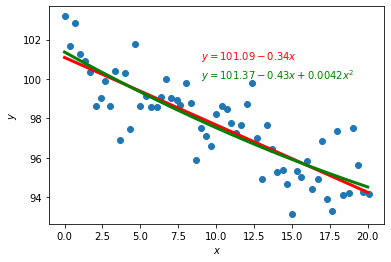

In [93]:
a = result.params["Intercept"]
b = result.params["x"]
a0 = sqr_result.params["Intercept"]
a1 = sqr_result.params["x"]
a2 = sqr_result.params["x2"]
fig,ax = plt.subplots()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.scatter(ScatterData["x"],ScatterData["y"])
ax.plot(x_plot.values,y_plot,"r-",linewidth=3)
ax.plot(x_plot.values,y2_plot,"g-",linewidth=3)
ax.text(9.0,101,r"$y = {:.2f} {:+.2g}x$".format(a,b),color="red")
ax.text(9.0,100,r"$y = {:.2f} {:+.2g}x {:+.2g}x^2$".format(a0,a1,a2),color="green")

### Non linear regression

When we want to make a non linear regression, for instance to fit with a model as $y=a_0+a_1*\exp{a_2*x}$, an optimization method to compute mininum squares has to be performed. We use then the [_optimize_](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) module of scipy, and, in particular, the [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) method.

In [94]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

We load the data. Now it can be just with an array instead of a pandas DataFrame.

In [95]:
[xdata,ydata] = np.loadtxt("Scatter_data.csv",delimiter=',').T #The traspose has to be made in order to load columns instead of rows

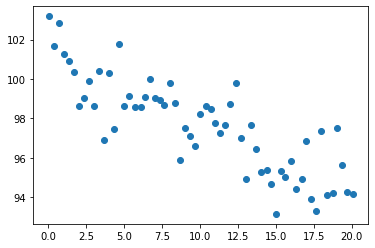

In [96]:
fig,ac = plt.subplots()
ac.scatter(xdata,ydata)

We define the fitting function (our model) with the independent variable $x$, and the set of parameters (the parameters name is free)

In [97]:
def f(x,a0,a1,a2):
    return a0+a1*np.exp(a2*x)

And we perform the curve fitting. Note the `p0` argument. It gives an initial guess. Otherwise the iterative process can be very long and eventually, it an fail. It gives two results. The first is the solution. The second is the covariance matrix. The diagonal of this matrix is the statistical variance of the solutions.

In [98]:
popt, pcov = opt.curve_fit(f,xdata,ydata, p0=[100,1,-1])

In [99]:
[a0,a1,a2] = popt

Let's calculate the predicted values of a uniform $x$ distribution

In [100]:
xdata_plot = np.linspace(0,20,250)
ydata_plot = f(xdata_plot,a0,a1,a2)

And let's plot it, with comparison with linear regression.

Text(9.0, 100, '$y = 84.38 +17e^{a2 x}$')

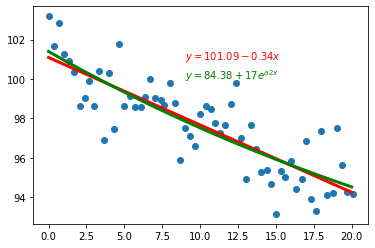

In [101]:
fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(x_plot.values,y_plot,"r-",linewidth=3)
ax.plot(xdata_plot,ydata_plot,"g-",linewidth=3)
ax.text(9.0,101,r"$y = {:.2f} {:+.2g}x$".format(a,b),color="red")
ax.text(9.0,100,r"$y = {:.2f} {:+.2g}e^{{a2 x}}$".format(a0,a1,a2),color="green")

The statsmodel ols gives the R-squared as part of the results.

In [102]:
result.rsquared

The scipy optimize doesn't do this computation, but it is easy to perform by hand, as stated in this [stackoverflow](https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit) answer, according to [wikipedia page](https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions).

In [103]:
residuals = ydata - f(xdata,a0,a1,a2)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)

In [104]:
r_squared

In the next command, the [watermark](https://github.com/rasbt/watermark/blob/master/README.md) extension is used in order to register the version of the libraries used in the Notebook. This is useful for the reproductibility.

In [106]:
try:
    %load_ext watermark
except:
    !pip install watermark
%watermark -v -m -iv

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.2.0

Compiler    : GCC 10.3.0
OS          : Linux
Release     : 5.4.0-137-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

scipy      : 1.8.0
numpy      : 1.22.3
matplotlib : 3.5.1
patsy      : 0.5.2
statsmodels: 0.13.2
pandas     : 1.4.2

